In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri May 27 22:15:13 2022

@author: rodrigo
"""

#Cargando librerías 
import importlib

import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import pandas as pd
import os
import sys
import itertools as it

from geneticalgorithm import geneticalgorithm as ga

root = os.getcwd() + "/.."

sys.path.insert(0, root)

import src.positioning_sensors as ps
importlib.reload(ps)

import src.network_fitness as netfit
importlib.reload(netfit)

import src.manageExperiments as me
importlib.reload(me)

import config.config as cfg
importlib.reload(cfg)


#read_global_variables

plt.style.use("ggplot")


fn = "linz_with_init_net_exp_2.txt"
setup = me.readConfigFile(fn)

#cargamos imagenes en luminance e importance
ilumina = setup["folder_input"] + setup["input_ntli"]
niveles = setup["folder_input"] + setup["input_evm"]
sigma_y = setup['filterg_sy']
sigma_x = setup['filterg_sx']
sigma = [sigma_y,sigma_x]

#Loading precalculated local and directed empirical variograms
path2output_semivars = (cfg.experiment 
          + setup["experiment_id"]
          + setup["folder_semivariances"]
          + setup["output_semivariances"] 
                       )


filesv = path2output_semivars + ".csv"
filesvmask = path2output_semivars + "mask.csv"

path2optimum_values_file = (cfg.experiment 
                           + setup["experiment_id"] 
                           + setup["folder_output"] 
                           )

saveOptimumValuesTofile = (path2optimum_values_file
                           + setup["output_values"]
                          )

saveArgsTofile = (path2optimum_values_file
                  + setup["output_args"]
                 )

data = pd.read_csv(filesv)
data_m = pd.read_csv(filesvmask)
variogram_set = np.array(data.iloc[:,3:])
variogram_set_m = np.array(data_m.iloc[:,3:])


#NLTI: luminance
#luminance = ps.readIMG(cfg.data + ilumina)

ilumina = cfg.data + setup["folder_input"] + setup["input_ntli"]
niveles = cfg.data + setup["folder_input"] + setup["input_evm"]

#NTLI: luminance
NTLI = ps.readIMG(ilumina)

from PIL import Image

In [2]:
fn = "linz_with_init_net_exp_2.txt"

In [3]:
setup = me.readConfigFile(fn)
for key in iter(setup):
    print(str(key)+":" ,setup[str(key)])

experiment_id: linz_experiment_with_initial_positions_no2/
folder_input: locations/linz/
folder_semivariances: semivariances/
folder_output: results/
input_ntli: world_atlas_linzn
input_evm: linz_prioridades
output_semivariances: semivariance050512022
output_values: optimum_values.csv
output_args: optimum_arguments.csv
desaturation_th: -1
neglect_values: -1
tolerance_distance: 0.5
tolerance_angle: 15
filterg_sx: 0.5
filterg_sy: 0.5
gaussian_mode: constant
init_fixed_net: [[39, 22], [35, 29], [34, 31], [34, 34], [36, 39]]
nsensors: [0, 1, 2, 3, 4, 5]
sensitivity_c: [1, 10, 20, 30, 40]
flatness_means_decrease: True
ga_params: {'max_num_iteration': 100, 'population_size': 2000, 'mutation_probability': 0.1, 'elit_ratio': 0.1, 'crossover_probability': 0.5, 'parents_portion': 0.3, 'crossover_type': 'uniform', 'max_iteration_without_improv': 500}


In [4]:
#cargamos imagenes en luminance e importance

img1 = cfg.data + setup["folder_input"] + setup["input_ntli"]
img2 = cfg.data + setup["folder_input"] + setup["input_evm"]

NTLI = np.array(Image.open(img1))
FDNTLI = sp.ndimage.gaussian_filter(NTLI, sigma, mode = setup['gaussian_mode'])

EAM = ps.readIMG(img2, invert = True)

c = 1

1
0
0
0
0


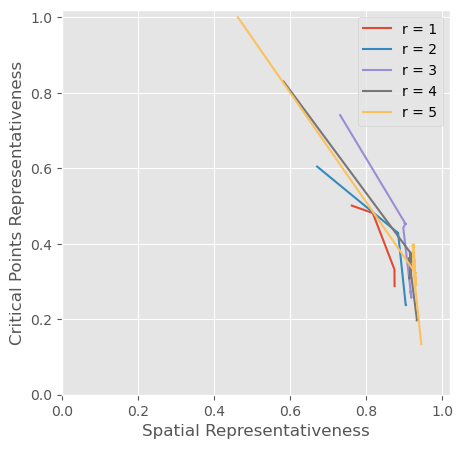

In [43]:
plt.figure(figsize=(5,5))
plt.xlim(0, 1+0.02)
plt.ylim(0, 1+0.02)

plt.xlabel("Spatial Representativeness")
plt.ylabel("Critical Points Representativeness")

for i in range(1, 6):
    G = pd.read_csv("nr_"+str(i)+".csv")
    plt.plot(G["J1"],G["J2"], label = "r = {a}".format(a=i))
    print(np.argmin(((1-G["J1"])**2 + (1-G["J2"])**2)**0.5))
    plt.legend()

0